# NAME : Sarpong Emmanuel Kwabena
### Data Science & Business Analytics Intern #GRIPAUGUST21
### At The Sparks Foundation(GRIP)
## Technical Task 2 : Prediction using Unsupervised Machine Learning
### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans 

In [2]:
df = pd.read_csv('downloads/iris.csv',usecols=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
df.value_counts('Species')

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [3]:
df.shape

(150, 5)

In [4]:
df.describe(include=['O'])

,Species
count,150
unique,3
top,Iris-setosa
freq,50


In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df3 = df[df['Species']== 'Iris-setosa']
df3

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


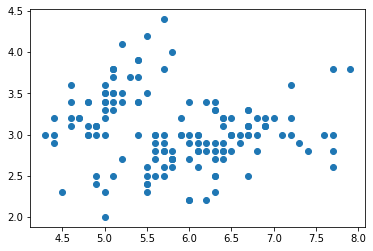

In [8]:
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'])

In [9]:
X = df.loc[:,df.columns!='Species']

In [17]:
sse =[]
for k in range(1,11):
    km=KMeans(n_clusters=k)
    km = km.fit(X)
    sse.append(km.inertia_)

In [18]:
sse

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.317873214285726,
 46.535582051282034,
 38.95701115711987,
 34.254373374210324,
 29.96334557109558,
 27.84235606060608,
 26.50946200857965]

Text(0, 0.5, 'wcs')

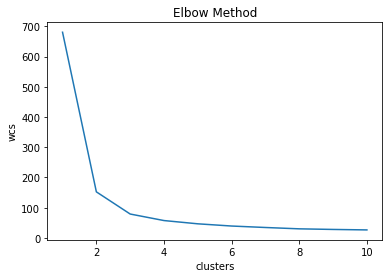

In [12]:
plt.plot(range(1,11),sse)
plt.title('Elbow Method')
plt.xlabel('clusters')
plt.ylabel('wcs')

In [13]:
km = KMeans(n_clusters=3)
km = km.fit_predict(X)
km

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [14]:
km = KMeans(n_clusters=3).fit(X)
km_ = km.labels_

In [15]:
df['Clusters'] = km_
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Clusters
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,0
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2
149,5.9,3.0,5.1,1.8,Iris-virginica,0


Text(0.5, 1.0, 'Cluster of Sepal length and Width')

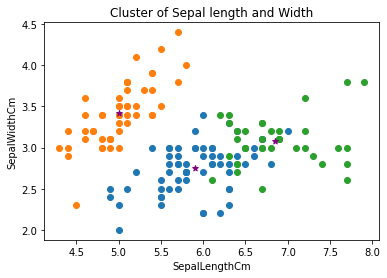

In [16]:
#Visualising the clusters on sepal length and width
df1 = df.loc[df['Clusters']==0, df.columns!= 'Species']
df2 = df.loc[df['Clusters']==1, df.columns!= 'Species']
df3 = df.loc[df['Clusters']==2, df.columns!= 'Species']

plt.scatter(df1['SepalLengthCm'],df1['SepalWidthCm'])
plt.scatter(df2['SepalLengthCm'],df2['SepalWidthCm'])
plt.scatter(df3['SepalLengthCm'],df3['SepalWidthCm'])
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*')

plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.title('Cluster of Sepal length and Width')

### The optimum number of clusters is: 3

## Thank you viewers for following along with me😁